<a href="https://colab.research.google.com/github/ofcoursenotcoding1/Monte-Carlo_Simulation/blob/main/Monte%E2%80%93Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [21]:


# Download data
df = yf.download(
    "VOO",
    start="2010-01-01",
    end="2025-08-30",
    auto_adjust=False,
    progress=False,
    group_by="column"
)
# Flatten MultiIndex columns if present
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

# Reset index so Date is a column
df = df.reset_index()

# Convert Date to YYYY-MM-DD format (remove time)
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d")

# Round numeric columns to 2 decimals
for col in df.select_dtypes(include=["float", "float64", "float32"]).columns:
    df[col] = df[col].round(2)

# Custom formatting functions
def format_float(x):
    return f"{x:>10.2f}"  # right-align, 10 spaces, 2 decimals

def format_int(x):
    return f"{x:>10,d}"   # right-align, commas for thousands

def format_str(x):
    return f"{x:<12}"     # left-align for dates

# Build formatter dict
formatters = {
    "Date": format_str
}
for col in df.select_dtypes(include=["float", "float64", "float32"]).columns:
    formatters[col] = format_float
for col in df.select_dtypes(include=["int64"]).columns:
    formatters[col] = format_int

# Print nicely formatted head
print(df.head().to_string(index=False, formatters=formatters))

df


        Date  Adj Close      Close       High        Low       Open     Volume
2010-09-09        77.21     101.32     102.50     101.14     102.50     26,500
2010-09-10        77.56     101.78     101.86     101.30     101.68      8,600
2010-09-13        78.54     103.06     103.14     102.50     102.96     33,750
2010-09-14        78.53     103.04     103.48     102.38     102.84     59,400
2010-09-15        78.72     103.30     103.38     102.40     102.62      9,250


,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-09-09,77.21,101.32,102.50,101.14,102.50,26500
1,2010-09-10,77.56,101.78,101.86,101.30,101.68,8600
2,2010-09-13,78.54,103.06,103.14,102.50,102.96,33750
3,2010-09-14,78.53,103.04,103.48,102.38,102.84,59400
4,2010-09-15,78.72,103.30,103.38,102.40,102.62,9250
...,...,...,...,...,...,...,...
3762,2025-08-25,590.70,590.70,593.23,590.55,592.05,6483000
3763,2025-08-26,593.06,593.06,593.43,589.79,590.38,4776600
3764,2025-08-27,594.42,594.42,595.14,592.44,592.52,6171400
3765,2025-08-28,596.52,596.52,597.07,593.27,595.07,5058700


In [22]:
#Simulation parameters
num_simulation = 150
forecast_days = 800

#Intialize the simulation array with all zeros
simulations = np.zeros((num_simulation, forecast_days))

#Calculating last adjusted close price
last_price = df['Adj Close'].iloc[-1]


#Caculate the daily returns and drop & remove NA values
daily_returns = df['Adj Close'].pct_change().dropna()


In [23]:
last_price

np.float64(593.08)

In [24]:
#Loop through number of simulation to forecast future cumulative returns for this asset(VOO)

for i in range(num_simulation):
  #get random daily returns of size forecast days and returns it cumulative returns

  #return an array of size forecast_days that contains randomly selected daily return and calculate that cumulative return
  cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace = True).cumsum()
  simulations[i, :] = last_price * (1+cumulative_returns)


# get the simulation with the random cumulative return

simulations

array([[ 590.32326921,  604.80366401,  613.44267822, ..., 1069.60429568,
        1077.301181  , 1079.61733428],
       [ 595.60324528,  599.83699682,  604.03462021, ...,  803.06713851,
         809.6300402 ,  806.03306793],
       [ 592.38601451,  592.26017534,  580.3967502 , ...,  621.16920579,
         621.158407  ,  620.3326778 ],
       ...,
       [ 592.74612122,  596.46965244,  596.56633526, ...,  965.61313702,
         972.11350051,  968.16318204],
       [ 593.74118172,  596.14654938,  593.15206684, ..., 1123.10820412,
        1123.2565589 , 1131.82258429],
       [ 596.53419617,  588.38426249,  600.54958738, ...,  616.82278447,
         616.42776244,  617.26909907]])

In [25]:
print(simulations[2, 0:4])

[592.38601451 592.26017534 580.3967502  584.17910039]


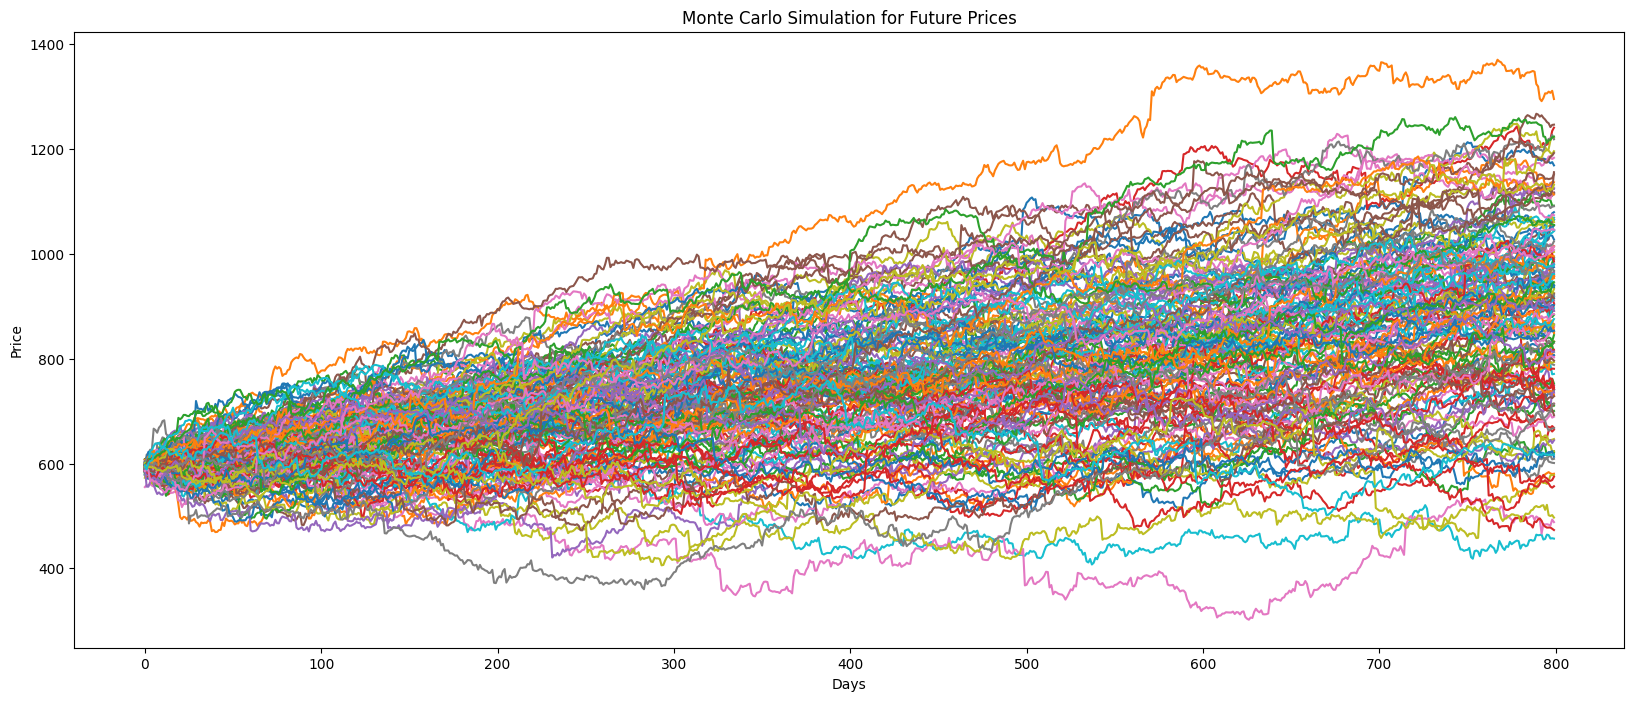

In [26]:
plt.figure(figsize=(20,8))
for i in range(num_simulation):
  plt.plot(simulations[i], alpha = 1)
plt.title('Monte Carlo Simulation for Future Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()